## PLEASE READ BELOW BEFORE RUNNING THIS NOTEBOOK

I have modified David's function called evolve_dynamics to output useful quantities during his evolutionary simulation.
For now, I am calling multicomponent_evolution_takumi in this repo.

**Author: Takumi**<br>
**Last updated on Sep 9, 2024**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
from importlib import reload

# BELOW ARE MODULES IN alps
sys.path.append('..')
import convex_hull as ch
import graph
import mm_helper as mmh
import multicomponent_evolution_takumi as me  # David's evolutionary algo

%matplotlib inline
%config InlineBackend.figure_format='retina'


__fontsize__ = 20
__figsize__ = (7.54, 7.54)
cmap = 'magma'

# See all available arguments in matplotlibrc
params = {'figure.figsize': __figsize__,
          'font.size': __fontsize__,  #text
        'legend.fontsize': __fontsize__, # legend
         'axes.labelsize': __fontsize__, # axes
         'axes.titlesize': __fontsize__,
         'xtick.labelsize': 14, # tick
         'ytick.labelsize': 14,
          'lines.linewidth': 3}
graph.update_figure_params(params)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
reload(mmh)
##### SIMULATION PARAMS ##############################
me.DT_INITIAL: float = 1e-2 # initial time step for the relaxation dynamics
me.TRACKER_INTERVAL: float = 10.0  # interval for convergence check
me.TOLERANCE: float = 1e-4  # tolerance used to decide when stationary state is reached
me.CLUSTER_DISTANCE: float = 1e-1  # cutoff value for determining composition clusters
me.PERFORMANCE_TOLERANCE: float = 0.5  # tolerance used when calculating performance
me.KILL_FRACTION: float = 0.3  # fraction of population that is replaced each generation
me.REPETITIONS: int = 64  # number of samples used to estimate the performancedt_tol
dt_tol  = 1e-18
#####SIMULATION SETTINGS ########################
num_comps = 3 # Number of components BESIDES solvent
num_phases = 15# Initial number of phases 
n = 1 # Number of runs
###### SPECIFY AVERAGE COMPOSITION ##########
phi_avg = np.asarray([0.17, 0.27, 0.35]) # volume fraction
# phi_avg /= np.sum(phi_avg) # Ensure that volume fraction sums to 1. 
phi_std = 0.1
############ DEFINE INTERACTION MATRIX #################
chi_mean = 6
chi_std = 0.1
# Make a random chi_matrix with its mean and std specified above 
# chi = me.random_interaction_matrix(num_comps, chi_mean=chi_mean, chi_std=chi_std, verbose=True)
 ####################################
print('Volume fraction of the solution, phi=(phi_sol, phi_rest)=', np.concatenate(([1 - np.sum(phi_avg)], phi_avg)))
for i in tqdm(range(n)):
    phi_i = mmh.get_composition_gaussian(num_phases, phi_avg, phi_std=phi_std, verbose=False) # Shape:  (nphases, ncomp)
    phi_f, phi_progress, time = me.evolve_dynamics(chi, phi_i, sort_phases=True, dt_tol=dt_tol, return_progress=True) 

    # VISUALIZE ALL STEPS (David's code often ends within two steps)
    fig, axes = mmh.visualize_mixtures(phi_progress, fignum=1+i, t=time, cmap='rainbow', chi=chi, solvent_color='azure') 

    # # Visualize only the initial and final phases
    # mmh.visualize_mixtures([phi_i, phi_f], fignum=1+i, cmap='rainbow', chi=chi, solvent_color='azure', gamma=0.8)
    print('Count the number of phases (this is not working well)', me.count_phases(phi_f), '\n') # this is not working well. To me, the system has not reached convergence. Adjust me.CLUSTER_DISTANCE to tune the sensitivity of finding phases.
plt.show()


Volume fraction of the solution, phi=(phi_sol, phi_rest)= [0.21 0.17 0.27 0.35]


  0%|          | 0/1 [00:00<?, ?it/s]

NameError: name 'chi' is not defined

Volume fraction of the solution, phi=(phi_sol, phi_rest)= [0.21 0.17 0.27 0.35]


  0%|          | 0/1 [00:00<?, ?it/s]

evolve_dynamics: Reached minimal time step. dt=8.881784197001253e-19 Returning the most recent phis.
Count the number of phases (this is not working well) 6 



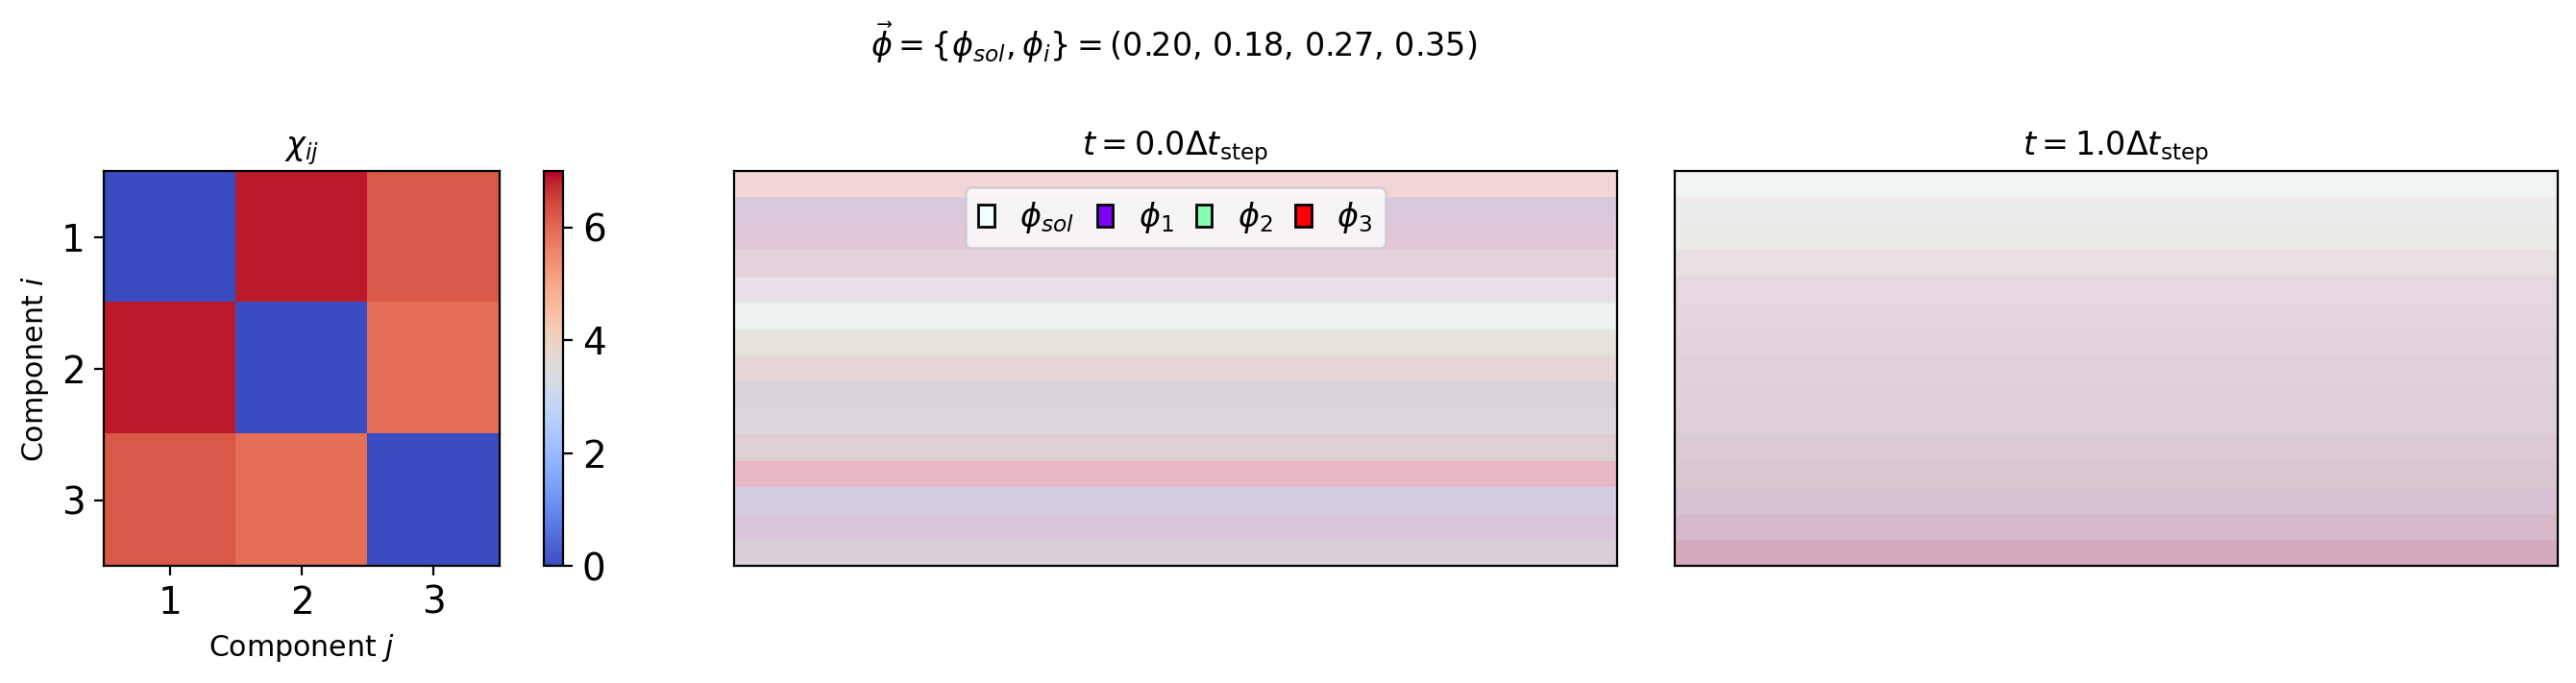

In [45]:
reload(mmh)
##### SIMULATION PARAMS ##############################
me.DT_INITIAL: float = 1e-3 # initial time step for the relaxation dynamics
me.TRACKER_INTERVAL: float = 10.0  # interval for convergence check
me.TOLERANCE: float = 1e-4  # tolerance used to decide when stationary state is reached
me.CLUSTER_DISTANCE: float = 1e-1  # cutoff value for determining composition clusters
me.PERFORMANCE_TOLERANCE: float = 0.5  # tolerance used when calculating performance
me.KILL_FRACTION: float = 0.3  # fraction of population that is replaced each generation
me.REPETITIONS: int = 64  # number of samples used to estimate the performancedt_tol
dt_tol  = 1e-18
#####SIMULATION SETTINGS ########################
num_comps = 3 # Number of components BESIDES solvent
num_phases = 15# Initial number of phases 
n = 1 # Number of runs
###### SPECIFY AVERAGE COMPOSITION ##########
# phi_avg = np.asarray([0.1, 0.2, 0.1, 0.3]) # volume fraction
# phi_avg /= np.sum(phi_avg) # Ensure that volume fraction sums to 1. 
# phi_std = 0.1
############ DEFINE INTERACTION MATRIX #################
chi_mean = 6
chi_std = 0.5
# Make a random chi_matrix with its mean and std specified above 
# chi = me.random_interaction_matrix(num_comps, chi_mean=chi_mean, chi_std=chi_std, verbose=True)
 ####################################
print('Volume fraction of the solution, phi=(phi_sol, phi_rest)=', np.concatenate(([1 - np.sum(phi_avg)], phi_avg)))
for i in tqdm(range(n)):
    # chi = me.random_interaction_matrix(num_comps, chi_mean=chi_mean, chi_std=chi_std, verbose=True)
    # phi_i = mmh.get_uniform_random_composition(num_phases, num_comps)
    phi_i = mmh.get_composition_gaussian(num_phases, phi_avg, phi_std=phi_std, verbose=False) # Shape:  (nphases, ncomp)
    phi_f, phi_progress, time = me.evolve_dynamics(chi, phi_i, sort_phases=True, dt_tol=dt_tol, return_progress=True) 

    # VISUALIZE ALL STEPS (David's code often ends within two steps)
    fig, axes = mmh.visualize_mixtures(phi_progress, fignum=1+i, t=time, cmap='rainbow', chi=chi, solvent_color='azure') 

    # # Visualize only the initial and final phases
    # mmh.visualize_mixtures([phi_i, phi_f], fignum=1+i, cmap='rainbow', chi=chi, solvent_color='azure', gamma=0.8)
    print('Count the number of phases (this is not working well)', me.count_phases(phi_f), '\n') # this is not working well. To me, the system has not reached convergence. Adjust me.CLUSTER_DISTANCE to tune the sensitivity of finding phases.
plt.show()

In [24]:
phi_f # [0.17, 0.27, 0.35]

array([[0.73901663, 0.7345155 , 0.72714162],
       [0.73901663, 0.7345155 , 0.72714162],
       [0.73901663, 0.7345155 , 0.72714162],
       [0.73901663, 0.7345155 , 0.72714162],
       [0.00836544, 0.7345155 , 0.72714162],
       [0.00836544, 0.7345155 , 0.01014612],
       [0.00836544, 0.01051225, 0.01014612],
       [0.00836544, 0.01051225, 0.01014612],
       [0.00836544, 0.01051225, 0.01014612],
       [0.00495278, 0.01051225, 0.01014612],
       [0.00495278, 0.01051225, 0.01014612],
       [0.00495278, 0.0048278 , 0.0078799 ],
       [0.00495278, 0.0048278 , 0.0078799 ],
       [0.00495278, 0.0048278 , 0.0078799 ],
       [0.00495278, 0.0048278 , 0.0078799 ]])

In [28]:
phi_f

array([[0.29617823, 0.47553922, 0.52044485],
       [0.29330125, 0.42013109, 0.50505577],
       [0.2845689 , 0.32007354, 0.46612212],
       [0.27103552, 0.30942878, 0.40674193],
       [0.22980231, 0.30392373, 0.39667309],
       [0.20374188, 0.29995682, 0.38679853],
       [0.19571776, 0.25126186, 0.35835941],
       [0.18759712, 0.24711224, 0.34491933],
       [0.16465458, 0.24413988, 0.34300199],
       [0.13909808, 0.23769964, 0.32084504],
       [0.09985159, 0.23357396, 0.29068327],
       [0.08063406, 0.19482259, 0.26588741],
       [0.06526038, 0.19290674, 0.20637918],
       [0.03348438, 0.12572509, 0.15861958],
       [0.00401593, 0.0684205 , 0.14235345]])